In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Задача классификации физических лиц по уровню дохода: <=50K или >50K

### Загрузка и обработка данных

In [2]:
# Загрузка датасета с информацией о физических лицах
individuals_df = pd.read_csv("./adult.csv")
individuals_df.head()	

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Преобразование бинарных ответов в формат 0 и 1
le = LabelEncoder()
le.fit(["<=50K", ">50K"])

individuals_df["income"] = le.transform(individuals_df["income"])
pd.DataFrame(individuals_df["income"]).head()

,income
0,0
1,0
2,1
3,1
4,0


In [4]:
print(f"Классы: {le.classes_}")
print(f"<=50K: {le.transform(['<=50K'])}")
print(f" >50K: {le.transform(['>50K'])}")

Классы: ['<=50K' '>50K']
<=50K: [0]
 >50K: [1]


In [5]:
len(individuals_df)

48842

In [6]:
# Проверка пропусков
individuals_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# Токенизация признаков и определение целевой переменной
X = pd.get_dummies(individuals_df.loc[: , ['age', 'workclass', 'fnlwgt', 'education', 'occupation', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']])
y = individuals_df["income"]

# Разбиение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=32)
X_train.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
26767,20,346341,0,0,35,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
22080,20,130840,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1210,45,178530,0,0,40,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
21061,49,65087,15024,0,50,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
34964,37,94334,0,0,25,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False


### Признаки, с которыми модель __НЕ__ становится лучше:  
* marital-status 
* race 
* native-country
* educational-num 

### Логистическая регрессия

In [22]:
log_model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
log_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [9]:
print(f"Точность модели на тестовых данных: {log_model.score(X_test, y_test)}")

Точность модели на тестовых данных: 0.8499257818498234


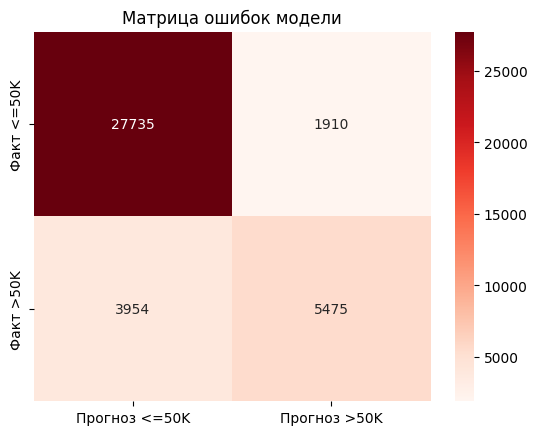

In [10]:
# Визуализация матрицы ошибок
predict = log_model.predict(X_test)
model_matrix = confusion_matrix(
    y_test, 
    predict, 
    labels=[0, 1]
    )
model_matrix_df = pd.DataFrame(model_matrix, columns=["Прогноз <=50K", "Прогноз >50K"], index=["Факт <=50K", "Факт >50K"])

plt.title('Матрица ошибок модели')
sns.heatmap(model_matrix_df, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.show()

### SVM

In [18]:
svc_model = make_pipeline(
    StandardScaler(),
     SVC(
         kernel="rbf",
         ),
)
svc_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [21]:
score = svc_model.score(X_test, y_test)
print(f"Точность SVC модели на тестовых данных: {score}")

Точность SVC модели на тестовых данных: 0.8495930797973077


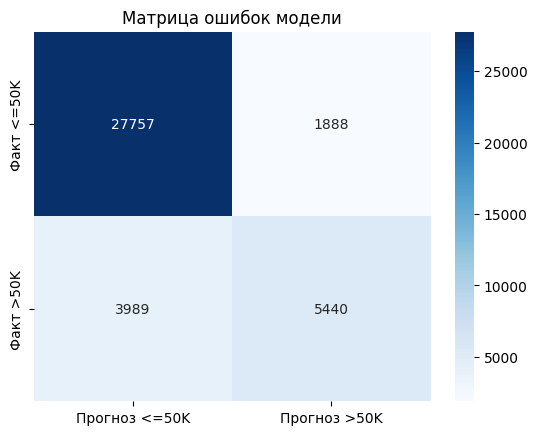

In [20]:
# Визуализация матрицы ошибок
predict = svc_model.predict(X_test)
model_matrix = confusion_matrix(
    y_test, 
    predict, 
    labels=[0, 1]
    )
model_matrix_df = pd.DataFrame(model_matrix, columns=["Прогноз <=50K", "Прогноз >50K"], index=["Факт <=50K", "Факт >50K"])

plt.title('Матрица ошибок модели')
sns.heatmap(model_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.show()

# Выводы
1. ##### Оба алгоритма подходят для задачи бинарной классификации, разве что возможно __SVM__ здесь немного уступает по скорости выполнения __логистической регрессии__, но __SVM__ может быть более гибким и хорошо подстраиваться под данные, меняя порядок, что в данной задаче как по мне не нужно. Так же __SVM__ можно применять для много классовой классификации, а  логистическая регрессия может выдавать расстояние от точки до разделительной линии, что можно интерпретировать как уверенность модели в классе. 

2. ##### Могу отметить, что  в данной задаче было полезно стандартизировать данные, это значительно улучшило качество моделей. Ещё я ознакомился с кодировщиками, которые могут переводить значения целевой переменный в фортам, который лучше подходит для обучения и метрикой `confusion_matrix` для отображения результатов тестирования модели. 

3. ##### Эмпирическим путём выявил, что в данных есть поля, которые не улучшают работу модели. 

### Метрики:
| № | Algorithm          | Fit-Time | Accuracy           |
| - | ------------------ | -------- | ------------------ |
| 1 | LogisticRegression | 0.01s     | 0.8499257818498234 |
| 2 | SVC                | 1.20s     | 0.8495930797973077 |